# Vinícius Renato Rocha Geraldo

## Import das bibliotecas

In [0]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.optimize import curve_fit
from pylab import *
from sympy import Symbol, Derivative, symbols

# Método dos Trapézios Repetidos



In [0]:
def Itr(a, b, fx, n):
  h = (b - a)/n
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  new_y = np.zeros(n + 1)
  # Construindo o vetor de intervalos para realizar o somatório
  x[0] = a
  for i in range(a, n + 1):
    x[i] = a + (i*h)
  
  # Utilizando os valores encontrados em x para trocar na função associada
  for i in range(a, n + 1):
    y[i] = fx(x[i])
  
  """
  Realizando a multiplicação por 2 dos valores do somatório, pois ao realizar o f(x)+f(x+1)
  os valores entre esses intervalos vão ser somados duas vezes 

  -- como exemplo 0 a 1 => utilizando um subintervalo de 10 valores de 0.1 quando for feito f(x) + f(x+1)
  ele se comportará da seguinte forma:

    f(0) + f(0.1)
    f(0.1) + f(0.2)
    f(0.2) + f(0.3)
    f(0.3) + f(0.4)
    .
    .
    .
  """
  for i in range(a, n + 1):
    if (i == 0):
      new_y[i] = y[i]
    
    elif (i == n):
      new_y[i] = y[n]
    
    else:
      new_y[i] = 2*y[i]
  
  somatorio = (h/2) * sum(new_y)
  print("Intervalos\n")
  print(x)
  print("\nFunção Resultante\n")
  print(y)
  print("\nFunção Utilizando Regra do Trapézio\n")
  print(new_y)
  print("\nSolução\n")
  print(somatorio)

In [4]:
# ## Exercício a
print("Exercício A\n")
fx = lambda x: x * math.log(x)
Itr(1, 2, fx, 4)

print("--------------------------------------------------\n")

## Exercício b
print("Exercício B\n")
fx = lambda x: (x**3) * math.exp(x)
Itr(-2, 2, fx, 4)

print("--------------------------------------------------\n")

print("Exercício C\n")
## Exercício c
fx = lambda x: 2 / (x**2 + 4)
Itr(0, 2, fx, 6)

print("--------------------------------------------------\n")

print("Exercício D\n")
## Exercício d
fx = lambda x: x**2 * math.cos(x)
Itr(0, 2, fx, 6)

print("--------------------------------------------------\n")

print("Exercício E\n")
## Exercício e
fx = lambda x: (math.exp(2*x)) * (math.sin(3*x))
Itr(0, 2, fx, 8)

print("--------------------------------------------------\n")

print("Exercício F\n")
## Exercício f
fx = lambda x: 2 / (x**2 + 4)
Itr(1, 3, fx, 8)

Exercício A

Intervalos

[1.   1.25 1.5  1.75 2.  ]

Função Resultante

[0.         0.27892944 0.60819766 0.97932763 1.38629436]

Função Utilizando Regra do Trapézio

[0.         0.55785888 1.21639532 1.95865526 1.38629436]

Solução

0.639900477687986
--------------------------------------------------

Exercício B

Intervalos

[-2. -1.  0.  1.  2.]

Função Resultante

[-1.08268227 -0.36787944  0.          2.71828183 59.11244879]

Função Utilizando Regra do Trapézio

[-1.08268227 -0.73575888  0.          5.43656366 59.11244879]

Solução

31.365285650063754
--------------------------------------------------

Exercício C

Intervalos

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ]

Função Resultante

[0.5        0.48648649 0.45       0.4        0.34615385 0.29508197
 0.25      ]

Função Utilizando Regra do Trapézio

[0.5        0.97297297 0.9        0.8        0.69230769 0.59016393
 0.25      ]

Solução

0.7842407666178157
----------------------------------

# Método 1/3 de Simpson Repetido



In [0]:
def Isr(a, b, fx, n):
  h = (b - a)/n
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  new_y = np.zeros(n + 1)
  # Construindo o vetor de intervalos para realizar o somatório
  x[0] = a
  for i in range(a, n + 1):
    x[i] = a + (i*h)

  for i in range(a, n + 1):
    y[i] = fx(x[i])
  

  for i in range(a, n + 1):
    if (i == 0):
      new_y[i] = y[i]
    
    elif (i == n):
      new_y[i] = y[n]
    
    elif ((i%2) == 0):
      new_y[i] = 2*y[i]
    
    else:
      new_y[i] = 4*y[i]

  somatorio = (h/3) * sum(new_y)
  print("Intervalos\n")
  print(x)
  print("\nFunção Resultante\n")
  print(y)
  print("\nFunção Utilizando Regra 1/3 de Simpson\n")
  print(new_y)
  print("\nSolução\n")
  print(somatorio)

In [6]:
#Teste
fx = lambda x: math.exp(x)
Isr(0, 1, fx, 10)

Intervalos

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

Função Resultante

[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872127
 1.8221188  2.01375271 2.22554093 2.45960311 2.71828183]

Função Utilizando Regra 1/3 de Simpson

[1.         4.42068367 2.44280552 5.39943523 2.9836494  6.59488508
 3.6442376  8.05501083 4.45108186 9.83841244 2.71828183]

Solução

1.7182827819248234


# Lista 11 - MÉTODO 1/3 DE SIMPSON REPETIDA

In [7]:
## Aplicando na Lista 10 o método de 1/3 Simpson Repetida

## Exercício a
print("Exercício A\n")
fx = lambda x: x * math.log(x)
Isr(1, 2, fx, 4)

print("--------------------------------------------------\n")

## Exercício b
print("Exercício B\n")
fx = lambda x: (x**3) * math.exp(x)
Isr(-2, 2, fx, 4)

print("--------------------------------------------------\n")

print("Exercício C\n")
## Exercício c
fx = lambda x: 2 / (x**2 + 4)
Isr(0, 2, fx, 6)

print("--------------------------------------------------\n")

print("Exercício D\n")
## Exercício d
fx = lambda x: x**2 * math.cos(x)
Isr(0, 2, fx, 6)

print("--------------------------------------------------\n")

print("Exercício E\n")
## Exercício e
fx = lambda x: (math.exp(2*x)) * (math.sin(3*x))
Isr(0, 2, fx, 8)

print("--------------------------------------------------\n")

print("Exercício F\n")
## Exercício f
fx = lambda x: 2 / (x**2 + 4)
Isr(1, 3, fx, 8)

Exercício A

Intervalos

[1.   1.25 1.5  1.75 2.  ]

Função Resultante

[0.         0.27892944 0.60819766 0.97932763 1.38629436]

Função Utilizando Regra 1/3 de Simpson

[0.         1.11571776 1.21639532 3.91731052 1.38629436]

Solução

0.6363098297969493
--------------------------------------------------

Exercício B

Intervalos

[-2. -1.  0.  1.  2.]

Função Resultante

[-1.08268227 -0.36787944  0.          2.71828183 59.11244879]

Função Utilizando Regra 1/3 de Simpson

[-1.08268227 -1.47151776  0.         10.87312731 59.11244879]

Solução

22.477125358234236
--------------------------------------------------

Exercício C

Intervalos

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ]

Função Resultante

[0.5        0.48648649 0.45       0.4        0.34615385 0.29508197
 0.25      ]

Função Utilizando Regra 1/3 de Simpson

[0.5        1.94594595 0.9        1.6        0.69230769 1.18032787
 0.25      ]

Solução

0.7853979452340107
------------------------

# Método 3/8 de Simpson Repetido

In [0]:
def Isr3_8(a, b, fx, n):
  h = (b - a)/n
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  new_y = np.zeros(n + 1)

  x[0] = a
  for i in range(0, n + 1):
    x[i] = a + (i*h)
  
  for i in range(0, n + 1):
    y[i] = fx(x[i])
  
  for i in range(0, n + 1):
    if(i == 0):
      new_y[i] = y[i]
    
    elif(i == n):
      new_y[i] = y[n]

    elif(i == 1 or i == 2):
      new_y[i] = 3*y[i]

    elif((i%3) == 0):
      new_y[i] = 3*y[i]

    else:
      new_y[i] = 2*y[i]


  somatorio = (3/8 * h) * (sum(new_y))
  print("Intervalos\n")
  print(x)
  print("\nFunção Resultante\n")
  print(y)
  print("\nFunção Utilizando Regra 3/8 de Simpson\n")
  print(new_y)
  print("\nSolução\n")
  print(somatorio)



In [9]:
#teste
fx = lambda x: 1/x
Isr3_8(1, 3, fx, 3)

Intervalos

[1.         1.66666667 2.33333333 3.        ]

Função Resultante

[1.         0.6        0.42857143 0.33333333]

Função Utilizando Regra 3/8 de Simpson

[1.         1.8        1.28571429 0.33333333]

Solução

1.1047619047619048


# Lista 11 - METODO 3/8 SIMPSON REPETIDO

In [10]:
## Aplicando na Lista 10 o método de 3/8 Simpson Repetida

## Exercício a
print("Exercício A\n")
fx = lambda x: x * math.log(x)
Isr3_8(1, 2, fx, 4)

print("--------------------------------------------------\n")

## Exercício b
print("Exercício B\n")
fx = lambda x: (x**3) * math.exp(x)
Isr3_8(-2, 2, fx, 4)

print("--------------------------------------------------\n")

## Exercício c
print("Exercício C\n")
fx = lambda x: 2 / (x**2 + 4)
Isr3_8(0, 2, fx, 6)


print("--------------------------------------------------\n")

print("Exercício D\n")
## Exercício d
fx = lambda x: x**2 * math.cos(x)
Isr3_8(0, 2, fx, 6)

print("--------------------------------------------------\n")

print("Exercício E\n")
## Exercício e
fx = lambda x: (math.exp(2*x)) * (math.sin(3*x))
Isr3_8(0, 2, fx, 8)

print("--------------------------------------------------\n")

print("Exercício F\n")
## Exercício f
fx = lambda x: 2 / (x**2 + 4)
Isr3_8(1, 3, fx, 8)

Exercício A

Intervalos

[1.   1.25 1.5  1.75 2.  ]

Função Resultante

[0.         0.27892944 0.60819766 0.97932763 1.38629436]

Função Utilizando Regra 3/8 de Simpson

[0.         0.83678832 1.82459299 2.93798289 1.38629436]

Solução

0.6549054892214894
--------------------------------------------------

Exercício B

Intervalos

[-2. -1.  0.  1.  2.]

Função Resultante

[-1.08268227 -0.36787944  0.          2.71828183 59.11244879]

Função Utilizando Regra 3/8 de Simpson

[-1.08268227 -1.10363832  0.          8.15484549 59.11244879]

Solução

24.405365132780666
--------------------------------------------------

Exercício C

Intervalos

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.        ]

Função Resultante

[0.5        0.48648649 0.45       0.4        0.34615385 0.29508197
 0.25      ]

Função Utilizando Regra 3/8 de Simpson

[0.5        1.45945946 1.35       1.2        0.69230769 0.59016393
 0.25      ]

Solução

0.7552413857741727
------------------------

# Diferenciação Numérica

1.   Método de Euler
2.   Método de Runge-Kutta de Segunda e Quarta Ordem

Todos esses métodos são para resolver métodos de equações diferenciais



## Método de Euler

In [0]:
def Euler(fxy, a, b, n, x0, y0):
  h = (b - a)/ n
  x = np.zeros(n+1)
  y = np.zeros(n+1)
  func = np.zeros(n+1)
  x[0] = x0
  y[0] = y0
  
  for i in range(x0, n):
    x[i+1] = x[i] + h
    y[i+1] = y[i] + h*fxy(x[i], y[i])
    func[i + 1] = fxy(x[i + 1], y[i + 1])
  
  #Saídas do Método de Euler
  plt.plot(x, y, '--', label = 'h = %.2f' %(h))
  plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.00), shadow = True, ncol = 2)
  zippedList = list(zip(x, y, func))
  saidas_pandas = pd.DataFrame(zippedList, columns=['Xk', 'Yk', 'Função'])

  print(saidas_pandas)
  

In [0]:
def Euler_primeira_ordem(fxy, a, b, n, x0, y0):
  h = (b - a)/ n
  x = np.zeros(n+1)
  y = np.zeros(n+1)
  p = np.zeros(n+1)
  q = np.zeros(n+1)
  #func = np.zeros(n+1)
  x[0] = x0
  y[0] = y0
  p[0] = h*fxy(y[0])
  q[0] = h*fxy(y[0] + p[0])
  for i in range(x0, n):
    x[i+1] = x[i] + h
    p[i] = h*fxy(y[i])
    q[i] = h*fxy(y[i] + p[i])
    y[i+1] = y[i] + h*(p[i] + q[i])
    
  #Saídas do Método de Euler
  zippedList = list(zip(x, y))
  saidas_pandas = pd.DataFrame(zippedList, columns=['Xk', 'Yk'])

  print(saidas_pandas)

In [0]:
def Euler_primeira_ordem(fxy, a, b, n, x0, y0):
  h = (b - a)/ n
  x = np.zeros(n+1)
  y = np.zeros(n+1)
  p = np.zeros(n+1)
  q = np.zeros(n+1)
  #func = np.zeros(n+1)
  x[0] = x0
  y[0] = y0
  p[0] = h*fxy(y[0])
  q[0] = h*fxy(y[0] + p[0])
  for i in range(x0, n):
    x[i+1] = x[i] + h
    p[i] = h*fxy(y[i])
    q[i] = h*fxy(y[i] + p[i])
    y[i+1] = y[i] + h*(p[i] + q[i])
    
  #Saídas do Método de Euler
  zippedList = list(zip(x, y))
  saidas_pandas = pd.DataFrame(zippedList, columns=['Xk', 'Yk'])

  print(saidas_pandas)

In [0]:
def eulerSegundaQuestao(fxy, a, h, x0, y0):
  x = []
  y = []
  func = []
  i = a
  x.append(x0)
  y.append(y0)

  while(y[i] > 0):
    x.append(x[i] + h)
    func.append(fxy(y[i]))
    y.append(y[i] + h*fxy(y[i]))
    i += 1

  #Saídas do Método de Euler
  # plt.plot(x, y, '--', label = 'h = %.2f' %(h))
  # plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.00), shadow = True, ncol = 2)
  zippedList = list(zip(x, y, func))
  saidas_pandas = pd.DataFrame(zippedList, columns=['Xk', 'Yk', 'Função'])

  print(saidas_pandas)

     Xk        Yk    Função
0   0.0  1.000000  0.000000
1   0.1  1.000000 -0.100000
2   0.2  0.990000 -0.198000
3   0.3  0.970200 -0.291060
4   0.4  0.941094 -0.376438
5   0.5  0.903450 -0.451725
6   0.6  0.858278 -0.514967
7   0.7  0.806781 -0.564747
8   0.8  0.750306 -0.600245
9   0.9  0.690282 -0.621254
10  1.0  0.628157 -0.628157


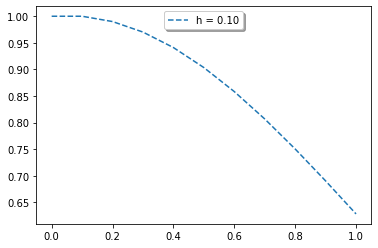

In [0]:
# Teste
fxy = lambda x, y: -x*y
Euler (fxy, 0, 1, 10, 0, 1)

## Método de Runge-Kutta (Segunda Ordem)

In [0]:
def rungeKuttaSegunda(fxy, a, b, n, x0, y0):
  #Inicialização dos vetores para realização dos cálculos
  h = (b - a)/n
  x = np.zeros(n)
  y = np.zeros(n)
  k1 = np.zeros(n)
  k2 = np.zeros(n)
  x[0] = x0
  y[0] = y0
  k1[0] = fxy(x[0], y[0])
  k2[0] = (-(x[0] + h))*(y[0] +(h*k1[0]))

  '''
  Será feito o método apresentado em aula hoje com o intuito de chegar no valor mais aproximado do 
  da derivação das funções, assim realizando uma operação de uma EDO. Estaremos fazendo por aproximações esse método 
  por utilizar da média dos intervalos passados como parametros:

        h/2 => por ser de segunda ordem
  
  quanto menor o valor do h mais preciso esse valor final da função se aproximará do desejado, então notamos que se quando aumentamos as interações
  do meu método mais vezes realiza a função para mais pontos associados
  
  '''

  #Realização das interações para o método de Runge-Kutta
  for i in range(x0, n - 1):
    x[i + 1] = x[i] + h
    y[i + 1] = y[i] + ((h/2)*(k1[i]+k2[i]))
    k1[i + 1] = fxy(x[i + 1], y[i + 1])
    k2[i + 1] = (-(x[i+1] + h))*(y[i+1]+h*k1[i+1])
  
  zippedlist = list(zip(x, y, k1 ,k2))
  pandas_saida = pd.DataFrame(zippedlist, columns=['Xk', 'Yk', 'K1', 'K2'])
  print(pandas_saida)

In [0]:
def RK2(fxy, a, b, n, x0, y0):
  h = (b - a)/ n
  x = np.zeros(n+1)
  y = np.zeros(n+1)
  p = np.zeros(n+1)
  q = np.zeros(n+1)
  #func = np.zeros(n+1)
  x[0] = x0
  y[0] = y0
  p[0] = h*fxy(y[0])
  q[0] = h*fxy(y[0] + p[0])
  for i in range(x0, n):
    x[i+1] = x[i] + h
    p[i] = h*fxy(y[i])
    q[i] = h*fxy(y[i] + p[i])
    y[i+1] = y[i] + (h/2)*(p[i] + q[i])

  zippedList = list(zip(x, y, p, q))
  saidas_pandas = pd.DataFrame(zippedList, columns=['Xk', 'Yk', 'P', 'Q'])

  print(saidas_pandas)

## Questão 2 - Função Modificada Metodo de Runge-Kutta (Segunda Ordem)

In [0]:
def rungeKuttaSegunda_q2(fxy, h, x0, y0):
  #Inicialização dos vetores para realização dos cálculos
  x = []
  y = []
  k1 = []
  k2 = []
  i = 0
  x.append(x0)
  y.append(y0)
  
  '''
  Será feito o método apresentado em aula hoje com o intuito de chegar no valor mais aproximado do 
  da derivação das funções, assim realizando uma operação de uma EDO. Estaremos fazendo por aproximações esse método 
  por utilizar da média dos intervalos passados como parametros:

        h/2 => por ser de segunda ordem
  
  quanto menor o valor do h mais preciso esse valor final da função se aproximará do desejado, então notamos que se quando aumentamos as interações
  do meu método mais vezes realiza a função para mais pontos associados
  
  '''

  #Realização das interações para o método de Runge-Kutta
  while (y[i] > 0.01):
    k1.append(fxy(y[i]))
    k2.append(fxy(y[i] + (k1[i]*h)))
    x.append(x[i] + h)
    y.append(y[i] + ((h/2)*(k1[i]+k2[i])))
    i+=1


  zippedlist = list(zip(x, y, k1 ,k2))
  pandas_saida = pd.DataFrame(zippedlist, columns=['Xk', 'Yk', 'K1', 'K2'])
  print(pandas_saida)

In [0]:
# Teste
fxy = lambda x, y: -x*y
rungeKuttaSegunda(fxy, 0, 1, 10, 0, 1)

    Xk        Yk        K1        K2
0  0.0  1.000000 -0.000000 -0.100000
1  0.1  0.995000 -0.099500 -0.197010
2  0.2  0.980174 -0.196035 -0.288171
3  0.3  0.955964 -0.286789 -0.370914
4  0.4  0.923079 -0.369232 -0.443078
5  0.5  0.882464 -0.441232 -0.503004
6  0.6  0.835252 -0.501151 -0.549596
7  0.7  0.782714 -0.547900 -0.582340
8  0.8  0.726202 -0.580962 -0.601296
9  0.9  0.667090 -0.600381 -0.607051


## Método de Runge-Kutta (Quarta Ordem)


In [0]:
def rungeKuttaQuarta(fxy, a, b, n, x0, y0):
  #Inicialização dos vetores para realização dos cálculos
  h = (b - a)/n
  x = np.zeros(n)
  y = np.zeros(n)
  k1 = np.zeros(n)
  k2 = np.zeros(n)
  k3 = np.zeros(n)
  k4 = np.zeros(n)


  y[0] = y0
  x[0] = x0
  k1[0] = fxy(x[0], y[0])
  k2[0] = fxy(x[0]+(h/2), y[0] + k1[0]*(h/2))
  k3[0] = fxy(x[0]+(h/2), y[0] + k2[0]*(h/2))
  k4[0] = fxy(x[0]+h, y[0] + k3[0]*h)

  for i in range (x0, n - 1):
    x[i+1] = x[i] + h
    y[i+1] = y[i] + (h/6)*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])
    k1[i+1] = fxy(x[i+1], y[i+1])
    k2[i+1] = fxy(x[i+1]+(h/2), y[i+1] + k1[i+1]*(h/2))
    k3[i+1] = fxy(x[i+1]+(h/2), y[i+1] + k2[i+1]*(h/2))
    k4[i+1] = fxy(x[i+1]+h, y[i+1] + k3[i+1]*h)

  plt.plot(x, y, '--', label = 'h = %.2f' %(h))
  plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.00), shadow = True, ncol = 2)

  zippedList = list(zip(x, y, k1, k2, k3, k4))
  pandas_saida = pd.DataFrame(zippedList, columns=['Xk', 'Yk', 'K1', 'K2', 'K3', 'K4'])
  print(pandas_saida)   

In [0]:
def RK4(fxy, a, b, n, x0, y0):
  h = (b - a)/ n
  x = np.zeros(n+1)
  y = np.zeros(n+1)
  p = np.zeros(n+1)
  q = np.zeros(n+1)
  #func = np.zeros(n+1)
  x[0] = x0
  y[0] = y0
  p[0] = h*fxy(y[0])
  q[0] = h*fxy(y[0] + p[0])
  for i in range(x0, n):
    x[i+1] = x[i] + h
    p[i] = h*fxy(y[i])
    q[i] = h*fxy(y[i] + p[i])
    y[i+1] = y[i] + (h/6)*(p[i] + q[i])

  zippedList = list(zip(x, y, p, q))
  saidas_pandas = pd.DataFrame(zippedList, columns=['Xk', 'Yk', 'P', 'Q'])

  print(saidas_pandas)

    Xk        Yk        K1        K2        K3        K4
0  0.0  1.000000 -0.000000 -0.050000 -0.049875 -0.099501
1  0.1  0.995012 -0.099501 -0.148506 -0.148138 -0.196040
2  0.2  0.980199 -0.196040 -0.242599 -0.242017 -0.286799
3  0.3  0.955997 -0.286799 -0.329580 -0.328831 -0.369246
4  0.4  0.923116 -0.369247 -0.407094 -0.406243 -0.441246
5  0.5  0.882497 -0.441248 -0.473239 -0.472359 -0.501157
6  0.6  0.835270 -0.501162 -0.526638 -0.525810 -0.547882
7  0.7  0.782705 -0.547893 -0.566482 -0.565785 -0.580901
8  0.8  0.726149 -0.580919 -0.592538 -0.592044 -0.600250
9  0.9  0.666977 -0.600279 -0.605115 -0.604885 -0.606488


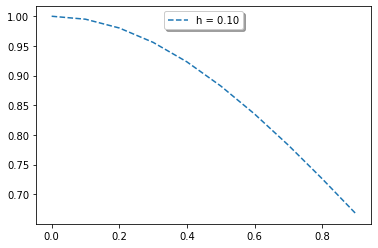

In [0]:
# Teste
fxy = lambda x, y: -x*y
rungeKuttaQuarta(fxy, 0, 1, 10, 0, 1)

## Questão 2 - Função Modificada Método de Runge-Kutta (Quarta Ordem)

In [0]:
def rungeKuttaQuarta_q2(fxy, h, x0, y0):
  x = []
  y = []
  k1 = []
  k2 = []
  k3 = []
  k4 = []
  x.append(x0)
  y.append(y0)

  i = 0

  while(y[i] > 0.01):
    k1.append(fxy(y[i]))
    k2.append(fxy(y[i] + (k1[i] * (h/2))))
    k3.append(fxy(y[i] + (k2[i] * (h/2))))
    k4.append(fxy(y[i] + (k3[i] * h)))
    y.append(y[i] + ((h/6) * (k1[i] + (2*k2[i]) + (2*k3[i]) + k4[i])))
    x.append(x[i] + h)
    i+=1

  
  zippedlist = list(zip(x, y, k1 ,k2, k3, k4))
  pandas_saida = pd.DataFrame(zippedlist, columns=['Xk', 'Yk', 'K1', 'K2', 'K3', 'K4'])
  print(pandas_saida)
  

# Lista 12 - Exercícios 1, 2, 3 (Euler)

Questão 1
    Xk         Yk
0  0.0  10.000000
1  1.0  66.645845
2  2.0  77.805403
3  3.0  80.091557
---------------------------------
Questão 2
       Xk        Yk    Função
0     0.0  3.000000 -0.103923
1     0.5  2.948038 -0.103019
2     1.0  2.896529 -0.102115
3     1.5  2.845471 -0.101211
4     2.0  2.794866 -0.100307
..    ...       ...       ...
108  54.0  0.008077 -0.005392
109  54.5  0.005381 -0.004401
110  55.0  0.003180 -0.003383
111  55.5  0.001488 -0.002315
112  56.0  0.000331 -0.001091

[113 rows x 3 columns]
---------------------------------
Questão 3
    Xk        Yk    Função
0  0.0  1.000000  0.000000
1  0.5  0.500000 -0.375000
2  1.0  0.312500  0.000000
3  1.5  0.312500  0.390625
4  2.0  0.507812  1.523438
---------------------------------
     Xk        Yk    Função
0  0.00  1.000000  0.000000
1  0.25  0.750000 -0.703125
2  0.50  0.574219 -0.430664
3  0.75  0.466553 -0.204117
4  1.00  0.415524  0.000000
5  1.25  0.415524  0.233732
6  1.50  0.473957  0.592446
7  1.75 

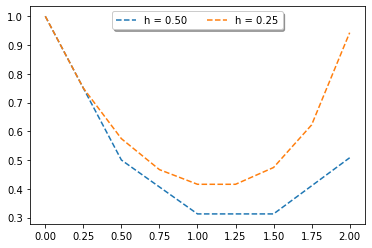

In [0]:
print('Questão 1')
# Questão 1
fxy = lambda y: (2*y)*((92-y)/92)
Euler_primeira_ordem(fxy, 0, 3, 3, 0, 10)
print('---------------------------------')
print('Questão 2')
fxy = lambda y: -k * math.sqrt(y)
k = 0.06
eulerSegundaQuestao(fxy, 0, 0.5, 0, 3)
print('---------------------------------')
print('Questão 3')
# Questão 3
fxy = lambda x, y: y*(x**2) - y
Euler (fxy, 0, 2, 4, 0, 1)
print('---------------------------------')
Euler (fxy, 0, 2, 8, 0, 1)

# Lista 12 Aplicando os Métodos de RK Segunda e Quarta Ordem

Questão 1 - RK2

    Xk         Yk          P          Q
0  0.0  10.000000  17.826087  38.819758
1  1.0  38.322923  44.718750  16.172055
2  2.0  68.768325  34.730508 -25.872083
3  3.0  73.197537   0.000000   0.000000

Questão 1 - RK4

    Xk         Yk          P          Q
0  0.0  10.000000  17.826087  38.819758
1  1.0  19.440974  30.665612  45.633390
2  2.0  32.157475  41.834445  28.966357
3  3.0  43.957608   0.000000   0.000000
--------------------------------------------------------

Questão 2 - RK2

       Xk        Yk        K1        K2
0     0.0  3.000000 -0.103923 -0.103019
1     0.5  2.948264 -0.103023 -0.102119
2     1.0  2.896979 -0.102123 -0.101219
3     1.5  2.846143 -0.101223 -0.100319
4     2.0  2.795758 -0.100323 -0.099419
..    ...       ...       ...       ...
104  52.0  0.029708 -0.010342 -0.009399
105  52.5  0.024773 -0.009444 -0.008496
106  53.0  0.020288 -0.008546 -0.007593
107  53.5  0.016253 -0.007649 -0.006689
108  54.0  0.012669 -0.006753 -0.005784

[109 rows

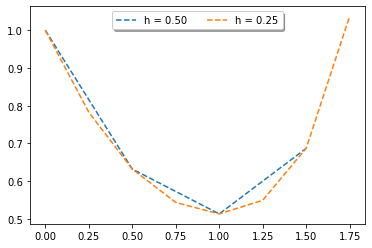

In [0]:
# Questão 1
print('Questão 1 - RK2\n')
fxy = lambda y: (2*y)*((92-y)/92)
RK2(fxy, 0, 3, 3, 0, 10)

print('\nQuestão 1 - RK4\n')
RK4(fxy, 0, 3, 3, 0, 10)
print('--------------------------------------------------------\n')

print('Questão 2 - RK2\n')
k = -0.06
fxy = lambda y: k * math.sqrt(y)
rungeKuttaSegunda_q2(fxy, 0.5, 0 , 3)


print('\nQuestão 2 - RK4\n')
fxy = lambda y: k * math.sqrt(y)
rungeKuttaQuarta_q2(fxy, 0.5, 0 , 3)

print('\n--------------------------------------------------------\n')
# Questão 4
print('Questão 4 - Aplicando h = 0.5 e h = 0.25\n')
fxy = lambda x, y: y*(x**2) - y
rungeKuttaQuarta (fxy, 0, 2, 4, 0, 1)
print('\n--------------------------------------------------------\n')
rungeKuttaQuarta (fxy, 0, 2, 8, 0, 1)